<a href="https://colab.research.google.com/github/Samplergithub769/Supermart-Grocery-Sales-Retail-Analysis/blob/main/Supermart_Grocery_Sales_Retail_Analytics_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# remove warnings
import warnings
warnings.filterwarnings('ignore')

**Load the Dataset**

In [4]:
df = pd.read_csv('/content/Supermart Grocery Sales - Retail Analytics Dataset.csv')


In [5]:
# Display the first five rows of the dataset
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [6]:
# Describe the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [7]:
# Checking the shape of the data
num_rows, num_cols = df.shape
print("Shape of the Data:")
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_cols}\n")

Shape of the Data:
Number of Rows: 9994
Number of Columns: 11



**Data Preprocessing**

In [8]:
#Check for missing values
print(df.isnull().sum())

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64


Convert Date Columns to DateTime Format

In [9]:
# Function to convert date with multiple formats

def convert_date(date_str):

    for fmt in ('%d-%m-%Y', '%m/%d/%Y'):

        try:

            return pd.to_datetime(date_str, format=fmt)

        except ValueError:

            continue

    return pd.NaT  # Return NaT if no format matches

# Apply the function to the 'Order Date' column
df['Order Date'] = df['Order Date'].apply(convert_date)

# Check for any NaT values after conversion
print(df['Order Date'].isnull().sum(), "dates could not be parsed.")

0 dates could not be parsed.


In [10]:
# Extract day, month, and year from 'Order Date'
df['Order Day'] = df['Order Date'].dt.day
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year

In [11]:
# Display first 5 rows to see the new columns
print(df[['Order Date', 'Order Day', 'Order Month', 'Order Year']].head())

  Order Date  Order Day  Order Month  Order Year
0 2017-08-11         11            8        2017
1 2017-08-11         11            8        2017
2 2017-12-06          6           12        2017
3 2016-11-10         10           11        2016
4 2016-11-10         10           11        2016


 Check for Duplicates

In [12]:
df.duplicated().any()

np.False_

**Exploratory Data Analysis (EDA)**

Top 10 Cities by Sales Performance

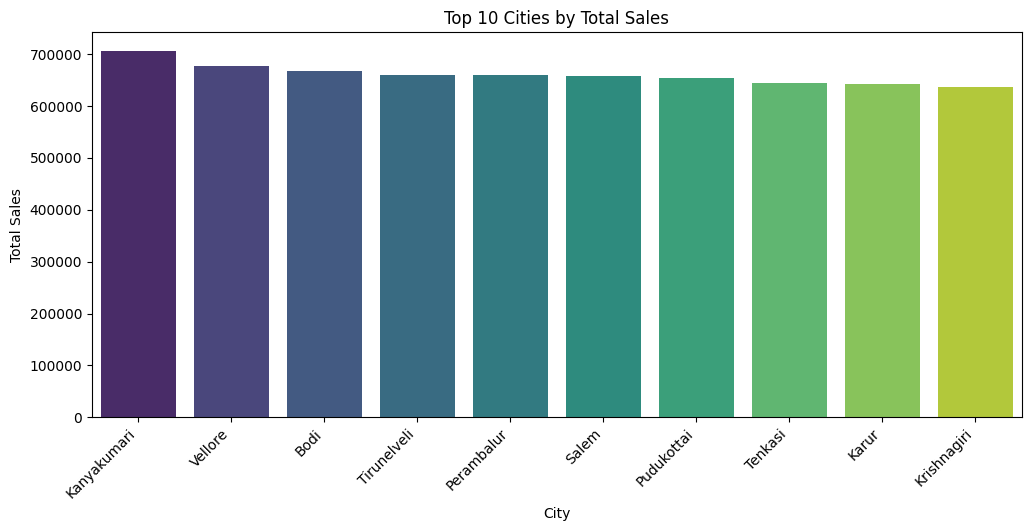

In [13]:
# Analyze total sales by city to identify the top-performing location
city_sales = df.groupby('City')['Sales'].sum().reset_index()
city_sales.sort_values(by='Sales', ascending=False, inplace=True)
# Plotting the top 10 cities by total sales
plt.figure(figsize=(12, 5))
sns.barplot(x='City', y='Sales', data=city_sales.head(10), palette='viridis')
plt.title('Top 10 Cities by Total Sales')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

Top 10 Cities by Profit Performance.

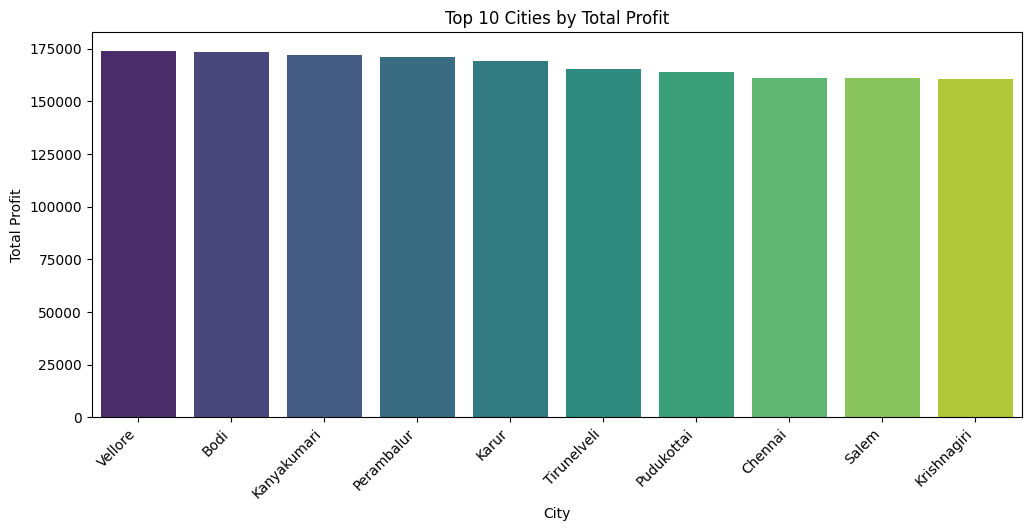

In [14]:
# Analyze total profit by city to identify the top-performing location
city_sales = df.groupby('City')['Profit'].sum().reset_index()
city_sales.sort_values(by='Profit', ascending=False, inplace=True)
# Plotting the top 10 cities by total profit
plt.figure(figsize=(12, 5))
sns.barplot(x='City', y='Profit', data=city_sales.head(10), palette='viridis')
plt.title('Top 10 Cities by Total Profit')
plt.xlabel('City')
plt.ylabel('Total Profit')
plt.xticks(rotation=45, ha='right')
plt.show()

In [15]:
city_sales

,City,Profit
21,Vellore,174073.01
0,Bodi,173655.13
6,Kanyakumari,172217.74
13,Perambalur,171132.19
7,Karur,169305.94
19,Tirunelveli,165169.01
14,Pudukottai,164072.63
1,Chennai,160921.33
16,Salem,160899.30
8,Krishnagiri,160477.48


Sales Trend Over Time

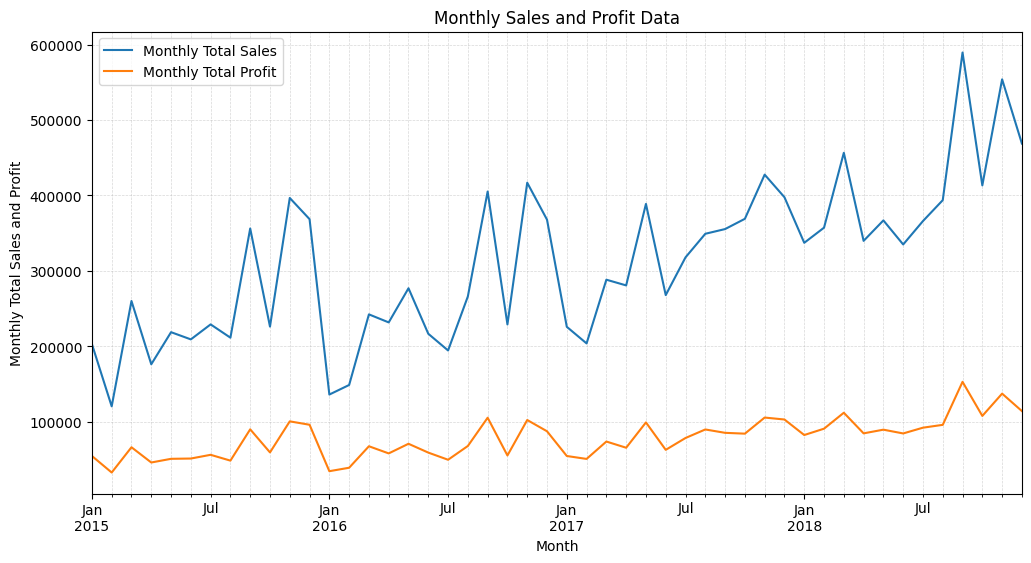

In [16]:
# Visualizing the monthly sales and profit data
plt.figure(figsize=(12, 6))
df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum().plot(label='Monthly Total Sales')
df.groupby(df['Order Date'].dt.to_period('M'))['Profit'].sum().plot(label='Monthly Total Profit')
plt.title('Monthly Sales and Profit Data')
plt.xlabel('Month')
plt.ylabel('Monthly Total Sales and Profit')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)  # Added light grid lines
plt.show()

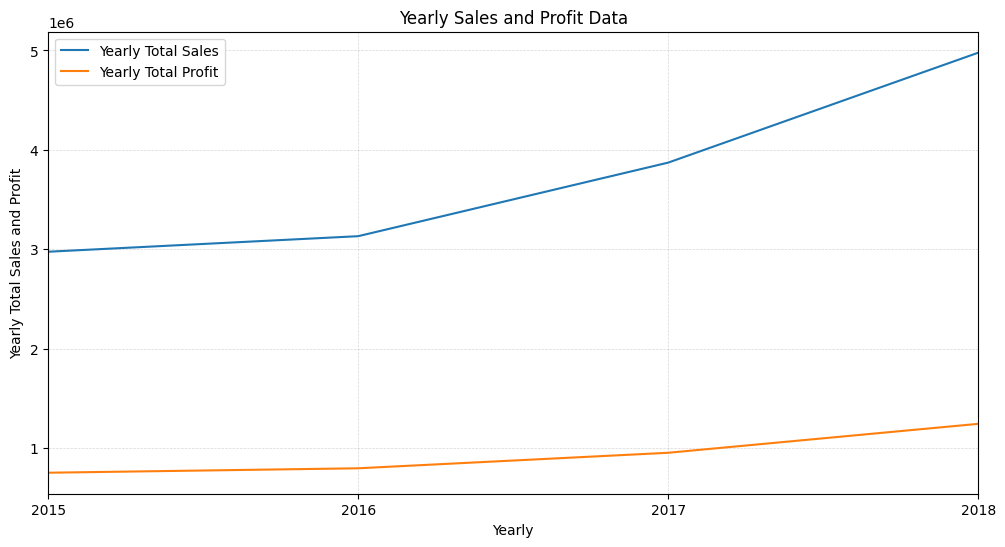

In [17]:
# Visualizing the yearly sales and profit data
plt.figure(figsize=(12, 6))
df.groupby(df['Order Date'].dt.to_period('Y'))['Sales'].sum().plot(label='Yearly Total Sales')
df.groupby(df['Order Date'].dt.to_period('Y'))['Profit'].sum().plot(label='Yearly Total Profit')
plt.title('Yearly Sales and Profit Data')
plt.xlabel('Yearly')
plt.ylabel('Yearly Total Sales and Profit')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)  # Added light grid lines
plt.show()

 Rate of Repeat Customers Over Time

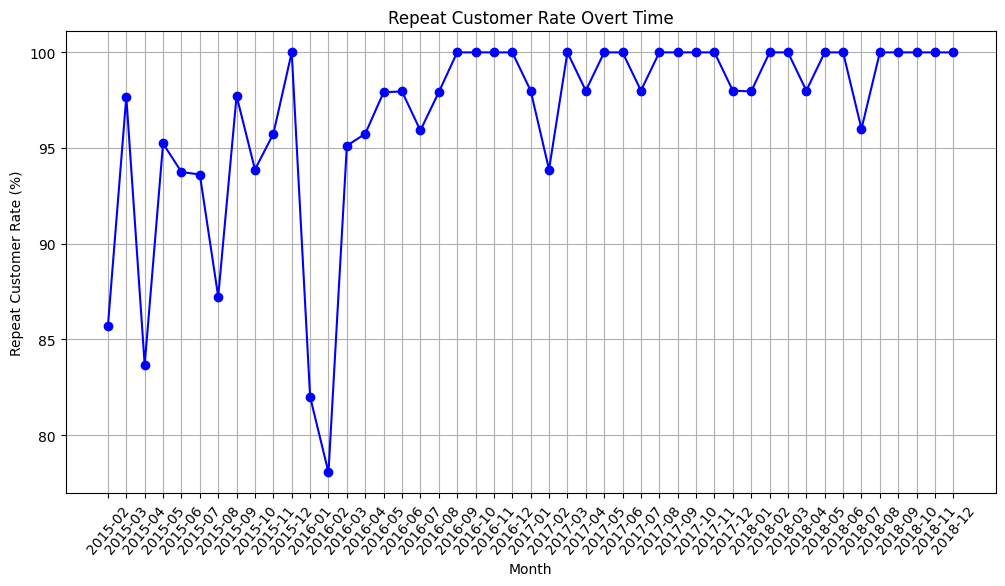

In [18]:
# Extract year and month
df['month'] = df['Order Date'].dt.to_period('M').sort_values()

# Get unique customers by month
customers_by_month = df.groupby('month')['Customer Name'].nunique()



# Initialize lists to store monthly retention rate values
start_customers = []
end_customers = []
new_customers = []
retention_rates = []



# Loop over each month
for i in range(1, len(customers_by_month)):
    # Start customers (S)
    start = customers_by_month.iloc[i-1]
    # End customers (E)
    end = customers_by_month.iloc[i]
    # New customers (N) in the current month
    current_month_customers = set(df[df['month'] == customers_by_month.index[i]]['Customer Name'])
    previous_month_customers = set(df[df['month'] == customers_by_month.index[i-1]]['Customer Name'])
    new_customers_in_month = len(current_month_customers - previous_month_customers)
    # Calculate retention rate using the formula
    retention_rate = ((end - new_customers_in_month) / start) * 100
    # Append results to the lists
    start_customers.append(start)
    end_customers.append(end)
    new_customers.append(new_customers_in_month)
    retention_rates.append(retention_rate)
# Create a DataFrame for retention rate data
retention_df = pd.DataFrame({
    'month': customers_by_month.index[1:],  # skip the first month
    'start_customers': start_customers,
    'end_customers': end_customers,
    'new_customers': new_customers,
    'retention_rate': retention_rates
})
# Plot the retention rate over time

plt.figure(figsize=(12,6))

plt.plot(retention_df['month'].astype(str), retention_df['retention_rate'], marker='o', color='b')

plt.title('Repeat Customer Rate Overt Time')

plt.xlabel('Month')

plt.ylabel('Repeat Customer Rate (%)')

plt.xticks(rotation=50)

plt.grid(True)

plt.show()


Average Purchase Value

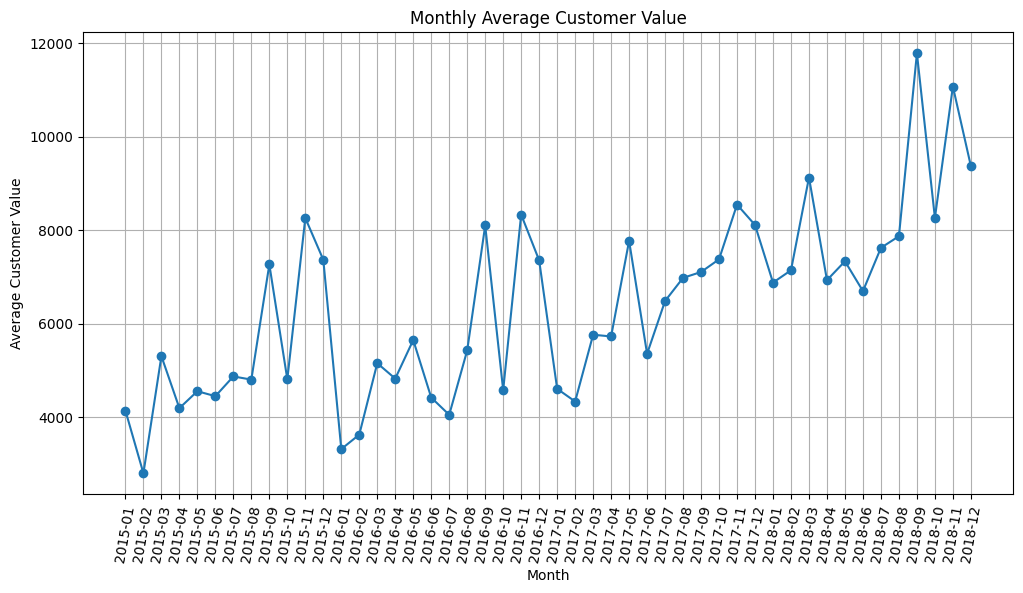

In [19]:
# Monthly Average Purchase Value
# Group by month and calculate total revenue and number of unique customers

monthly_data = df.groupby('month').agg(

    total_revenue=('Sales', 'sum'),

    unique_customers=('Customer Name', pd.Series.nunique)

).reset_index()

# Calculate Average Customer Value (ACV)

monthly_data['average_customer_value'] = monthly_data['total_revenue'] / monthly_data['unique_customers']

# Plot Average Customer Value

plt.figure(figsize=(12,6))

plt.plot(monthly_data['month'].astype(str), monthly_data['average_customer_value'], marker='o')

plt.title('Monthly Average Customer Value')

plt.xlabel('Month')

plt.ylabel('Average Customer Value')

plt.xticks(rotation=80)

plt.grid(True)

plt.show()


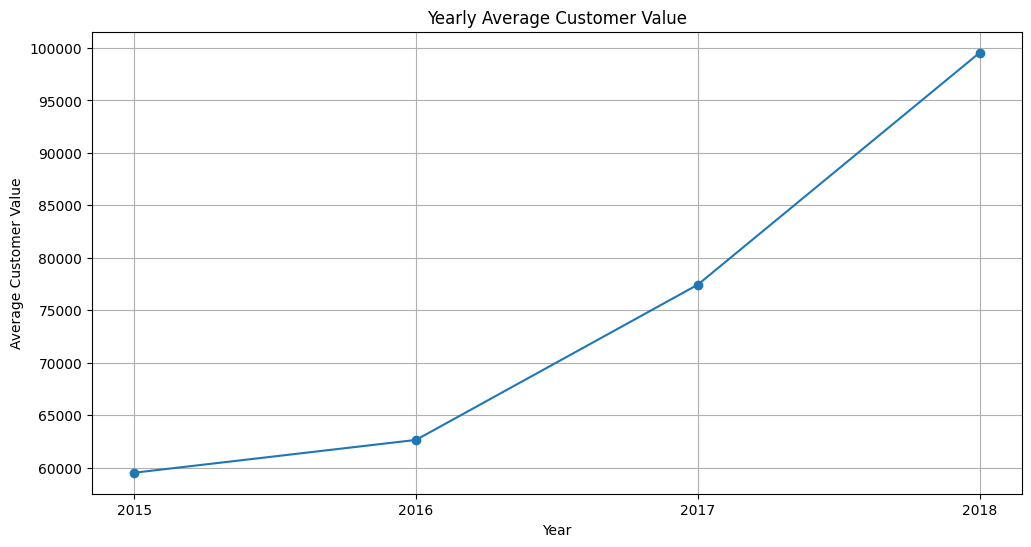

In [20]:
# Yearly Average Purchase Value
# Group by year and calculate total revenue and number of unique customers

yearly_data = df.groupby('Order Year').agg(

    total_revenue=('Sales', 'sum'),

    unique_customers=('Customer Name', pd.Series.nunique)

).reset_index()

# Calculate Average Customer Value (ACV)

yearly_data['average_customer_value'] = yearly_data['total_revenue'] / yearly_data['unique_customers']

# Plot Average Customer Value

plt.figure(figsize=(12,6))

plt.plot(yearly_data['Order Year'].astype(str), yearly_data['average_customer_value'], marker='o')

plt.title('Yearly Average Customer Value')

plt.xlabel('Year')

plt.ylabel('Average Customer Value')

plt.grid(True)

plt.show()
